In [1]:
%%shell
if ! command -v julia 3>&1 > /dev/null
then
    wget 'https://julialang-s3.julialang.org/bin/linux/x64/1.4/julia-1.4.1-linux-x86_64.tar.gz' -O julia.tar.gz
    tar -x -f julia.tar.gz -C /usr/local --strip-components 1
    rm julia.tar.gz
fi
    julia -e '\
        using Pkg                                                          ;\
        Pkg.update()                                                       ;\
        Pkg.add("IJulia")                                                  ;\
        Pkg.add("BenchmarkTools")                                          ;\
        Pkg.add("CuArrays")                                                ;\
        Pkg.add("StatsBase")                                               ;\
        Pkg.add("DataFrames")                                              ;\
        Pkg.add("CSV")                                                     ;\
        Pkg.add("Statistics")                                              ;\
        Pkg.add("RDatasets")                                               ;\
        Pkg.add("Gadfly")                                                  ;\
        Pkg.add("Cairo")                                                   ;\
        Pkg.add("Fontconfig")                                              ;\
        Pkg.update()                                                       ;\
        Pkg.precompile()                                                   ;\'
echo 'Done'

   Updating registry at `~/.julia/registries/General`
   Updating git-repo `https://github.com/JuliaRegistries/General.git`
   Updating `~/.julia/environments/v1.4/Project.toml`
 [no changes]
   Updating `~/.julia/environments/v1.4/Manifest.toml`
 [no changes]
  Resolving package versions...
   Updating `~/.julia/environments/v1.4/Project.toml`
 [no changes]
   Updating `~/.julia/environments/v1.4/Manifest.toml`
 [no changes]
  Resolving package versions...
   Updating `~/.julia/environments/v1.4/Project.toml`
 [no changes]
   Updating `~/.julia/environments/v1.4/Manifest.toml`
 [no changes]
  Resolving package versions...
   Updating `~/.julia/environments/v1.4/Project.toml`
 [no changes]
   Updating `~/.julia/environments/v1.4/Manifest.toml`
 [no changes]
  Resolving package versions...
   Updating `~/.julia/environments/v1.4/Project.toml`
 [no changes]
   Updating `~/.julia/environments/v1.4/Manifest.toml`
 [no changes]
  Resolving package versions...
   Updating `~/.julia/environme

# Julia 基礎圖表繪製：圖表結合敘述統計

## 作業 024：繪製帶統計資訊的圖表

繪製 iris 資料的散佈圖，x 軸為 PetalLength，y 軸為 PetalWidth，並依不同花的種類分別算出 PetalLength 及 PetalWidth 的平均值，將平均值以鉛直線與水平線標在圖上。（請完成以下程式碼）

3×3 DataFrame
│ Row │ Species      │ PetalLength │ PetalWidth │
│     │ Categorical… │ Float64     │ Float64    │
├─────┼──────────────┼─────────────┼────────────┤
│ 1   │ setosa       │ 1.462       │ 0.246      │
│ 2   │ versicolor   │ 4.26        │ 1.326      │
│ 3   │ virginica    │ 5.552       │ 2.026      │


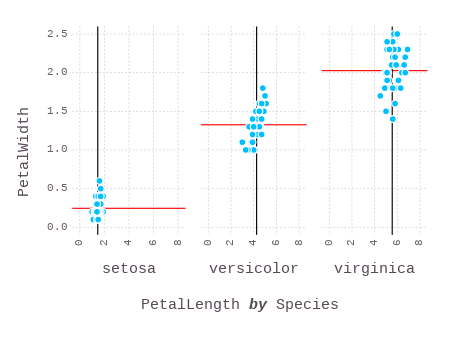

In [2]:
from google.colab.patches import cv2_imshow
import cv2

!julia -e '\
using StatsBase, RDatasets, Gadfly                                                                                             ;\
import Cairo, Fontconfig                                                                                                       ;\
iris = dataset("datasets", "iris")                                                                                             ;\
meanDf = by(iris, :Species, PetalLength = :PetalLength => mean, PetalWidth = :PetalWidth => mean )                             ;\
println(meanDf)                                                                                                                ;\
Dhl = DataFrame(xint=meanDf.PetalLength[1:3], yint=meanDf.PetalWidth[1:3],  Species=repeat(meanDf.Species[1:3], inner=[1]) )   ;\
petal = plot(iris, xgroup=:Species, x=:PetalLength, y=:PetalWidth, Geom.subplot_grid( layer(Geom.point), layer( Dhl, xgroup=:Species, xintercept=:xint, Geom.vline(color=["black"]), yintercept=:yint, Geom.hline(color="red") ) ) )       ;\
draw(PNG("petal.png", 12cm, 9cm), petal)                                                                                       ;\'

cv2_imshow( cv2.imread('petal.png', cv2.IMREAD_UNCHANGED))